<a href="https://colab.research.google.com/github/FaisAkbar/PCVK_Ganjil_2023/blob/main/Pertemuan7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MODULE 7 – Filter Spasial Low Pass Filter, High Pass Filter, Point Detection, Line Detection, Edge Detection
### Nama : Fawaa'el Akbar Firdaus
### No : 10
### NIM : 2141720215
### Kelas : TI-3B
### GitHub : https://github.com/FaisAkbar/PCVK_Ganjil_2023

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [4]:
def convolution2d(image, kernel, stride, padding):
  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
  return new_image

In [5]:
#input Image
img = cv.imread('/content/drive/MyDrive/PCVK/P7/Salinan female.png')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

### Sharpen

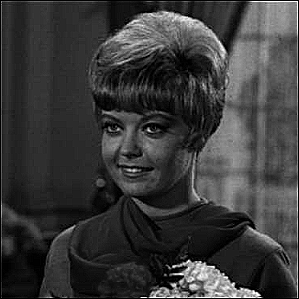

In [6]:
kernel_sharpen =np.array([[0,-1,0],
                         [-1,5,-1],
                         [0,-1,0]])
cv2_imshow(convolution2d(img_gray,kernel_sharpen,1,2))

### Emboss

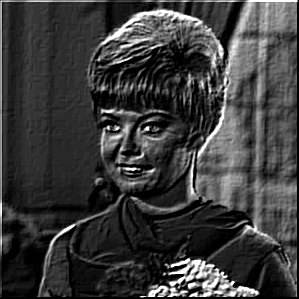

In [7]:
kernel_emboss =np.array([[-2,-1,0],
                         [-1,1,1],
                         [0,1,2]])
cv2_imshow(convolution2d(img_gray,kernel_emboss,1,2))

### Left Sobel Edge Detection

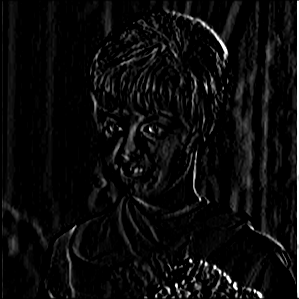

In [9]:
kernel_LeftSobelEdgeDetection =np.array([[1,0,-1],
                         [2,0,-2],
                         [1,0,-1]])
cv2_imshow(convolution2d(img_gray,kernel_LeftSobelEdgeDetection,1,2))

### Left Sobel Edge Detection

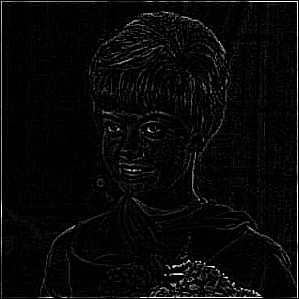

In [11]:
kernel_CannyEdgeDetection =np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])
cv2_imshow(convolution2d(img_gray,kernel_CannyEdgeDetection,1,2))

### Prewitt Edge Detection

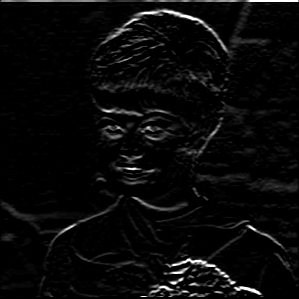

In [13]:
kernel_PrewittEdgeDetection =np.array([[-1,-1,-1],
                         [0,0,0],
                         [1,1,1]])
cv2_imshow(convolution2d(img_gray,kernel_PrewittEdgeDetection,1,2))

### 5x5 Gaussian Blur

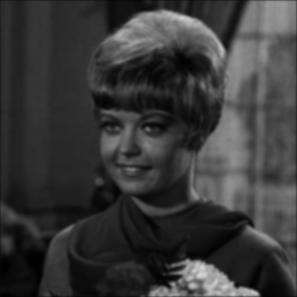

In [14]:
gaussian_blur_kernel = np.array([
    [1,  4,  6,  4,  1],
    [4, 16, 24, 16,  4],
    [6, 24, 36, 24,  6],
    [4, 16, 24, 16,  4],
    [1,  4,  6,  4,  1]
], dtype=np.float32) / 256.0
cv2_imshow(convolution2d(img_gray,gaussian_blur_kernel,1,2))

### 21x21 Gaussian Blur

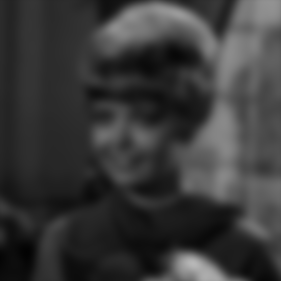

In [15]:
# Mendefinisikan kernel_size
kernel_size = 21

# Calculate the standard deviation based on the kernel size
sigma = math.sqrt(kernel_size)

# Generate the 1D Gaussian kernel
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)

# Create a 2D Gaussian kernel by taking the outer product of the 1D kernel
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray,gauss_kernel,1,2))